In [27]:
import pandas as pd
import numpy as np

In [28]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnz_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+"Stable Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Stable Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257,:]
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Stable Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Stable Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Stable Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Stable Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]

In [29]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnzChaos_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
chaos_state_eval = (pd.concat([score_state_eval.rename({d:d+"Chaos Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Chaos Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257,:]
chaos_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Chaos Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Chaos Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]
chaos_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Chaos Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Chaos Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]

In [30]:
time_ax = np.linspace(1/256, 1/256*(chaos_alt_law_eval.shape[0]),chaos_alt_law_eval.shape[0])

In [31]:
true_law_eval = (pd.concat([chaos_true_law_eval, stable_true_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [32]:
alt_law_eval =(pd.concat([chaos_alt_law_eval, stable_alt_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [33]:
state_eval = (pd.concat([chaos_state_eval, stable_state_eval], axis=1)).iloc[1:, :].sort_index(axis=1).set_index(time_ax)**2

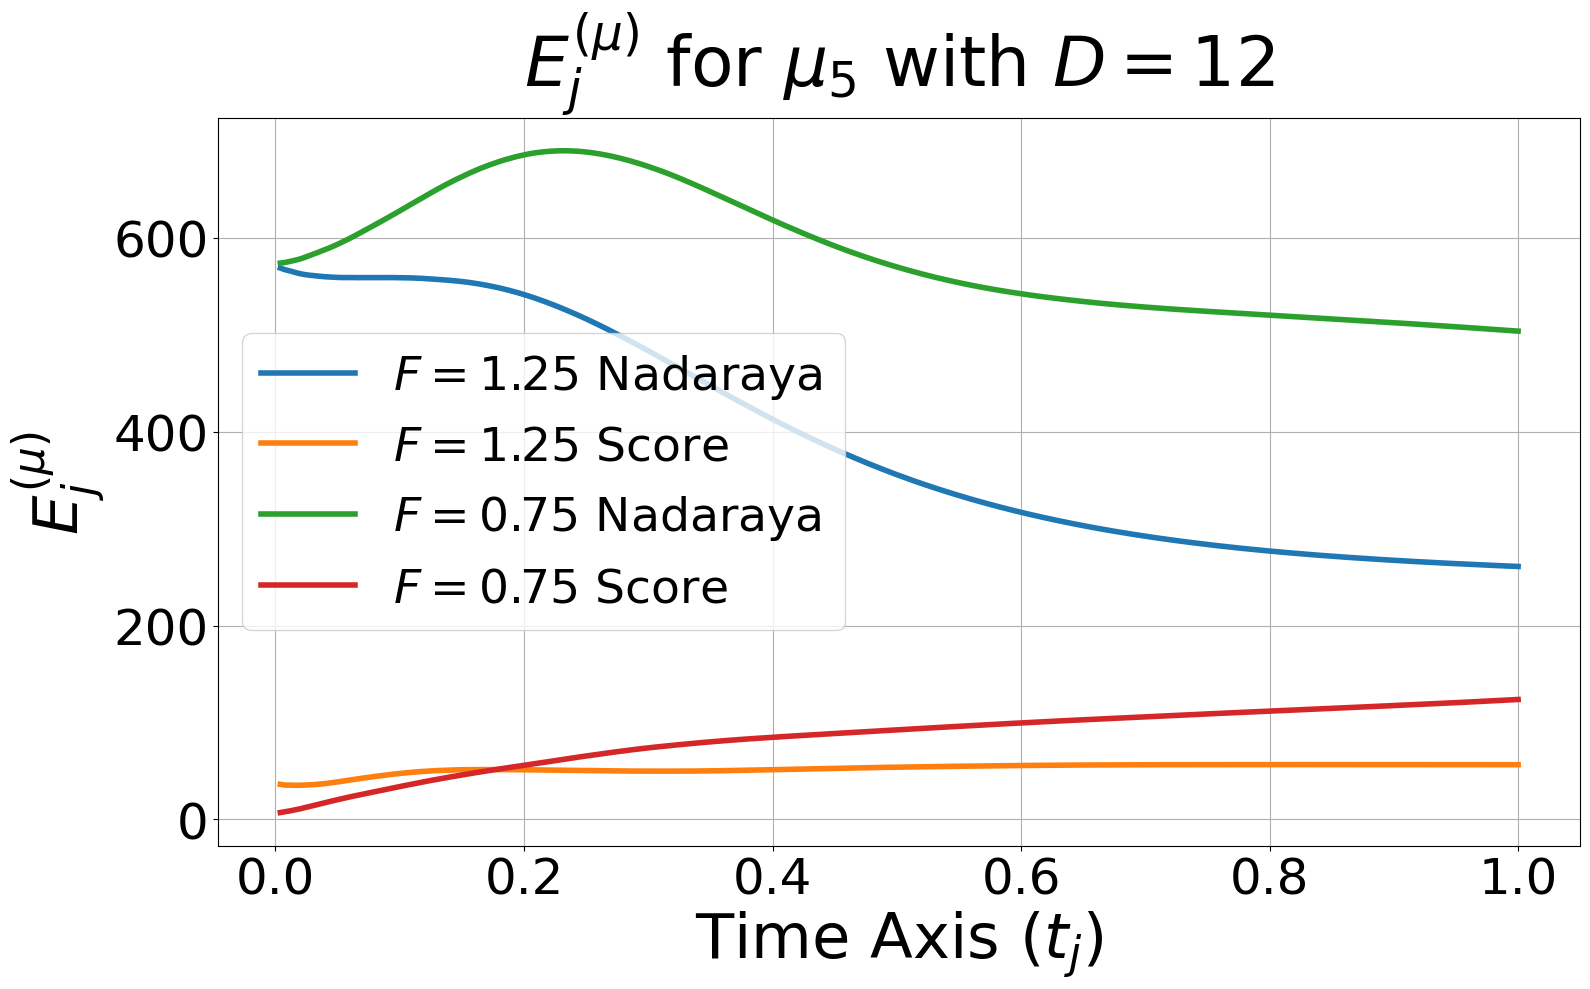

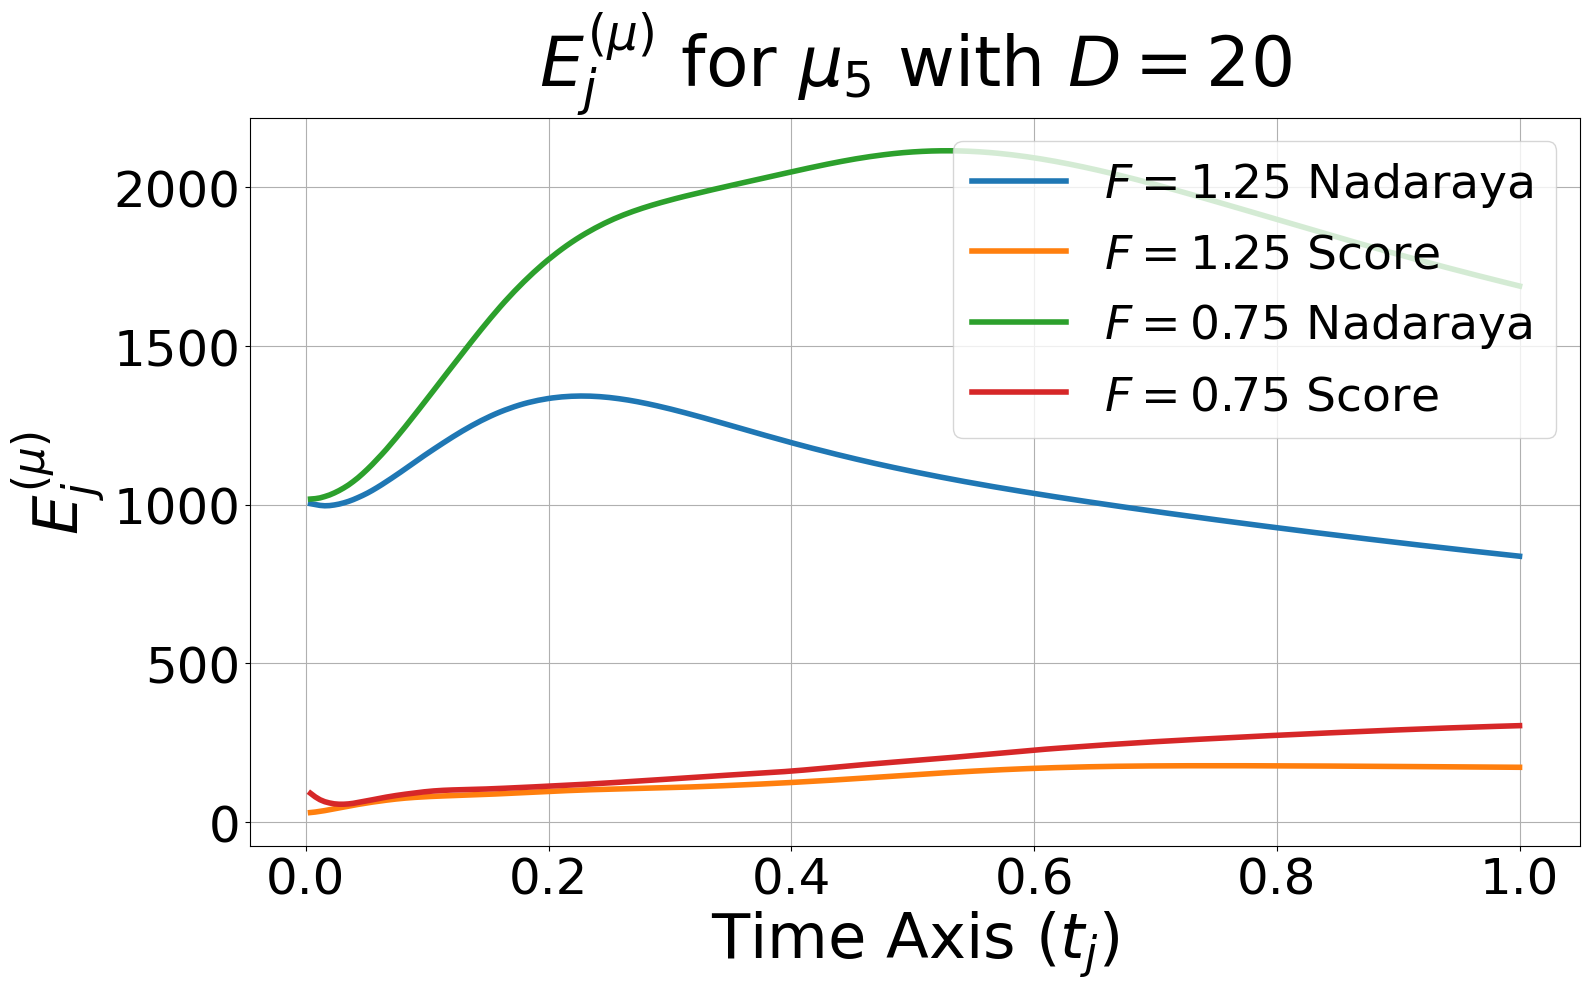

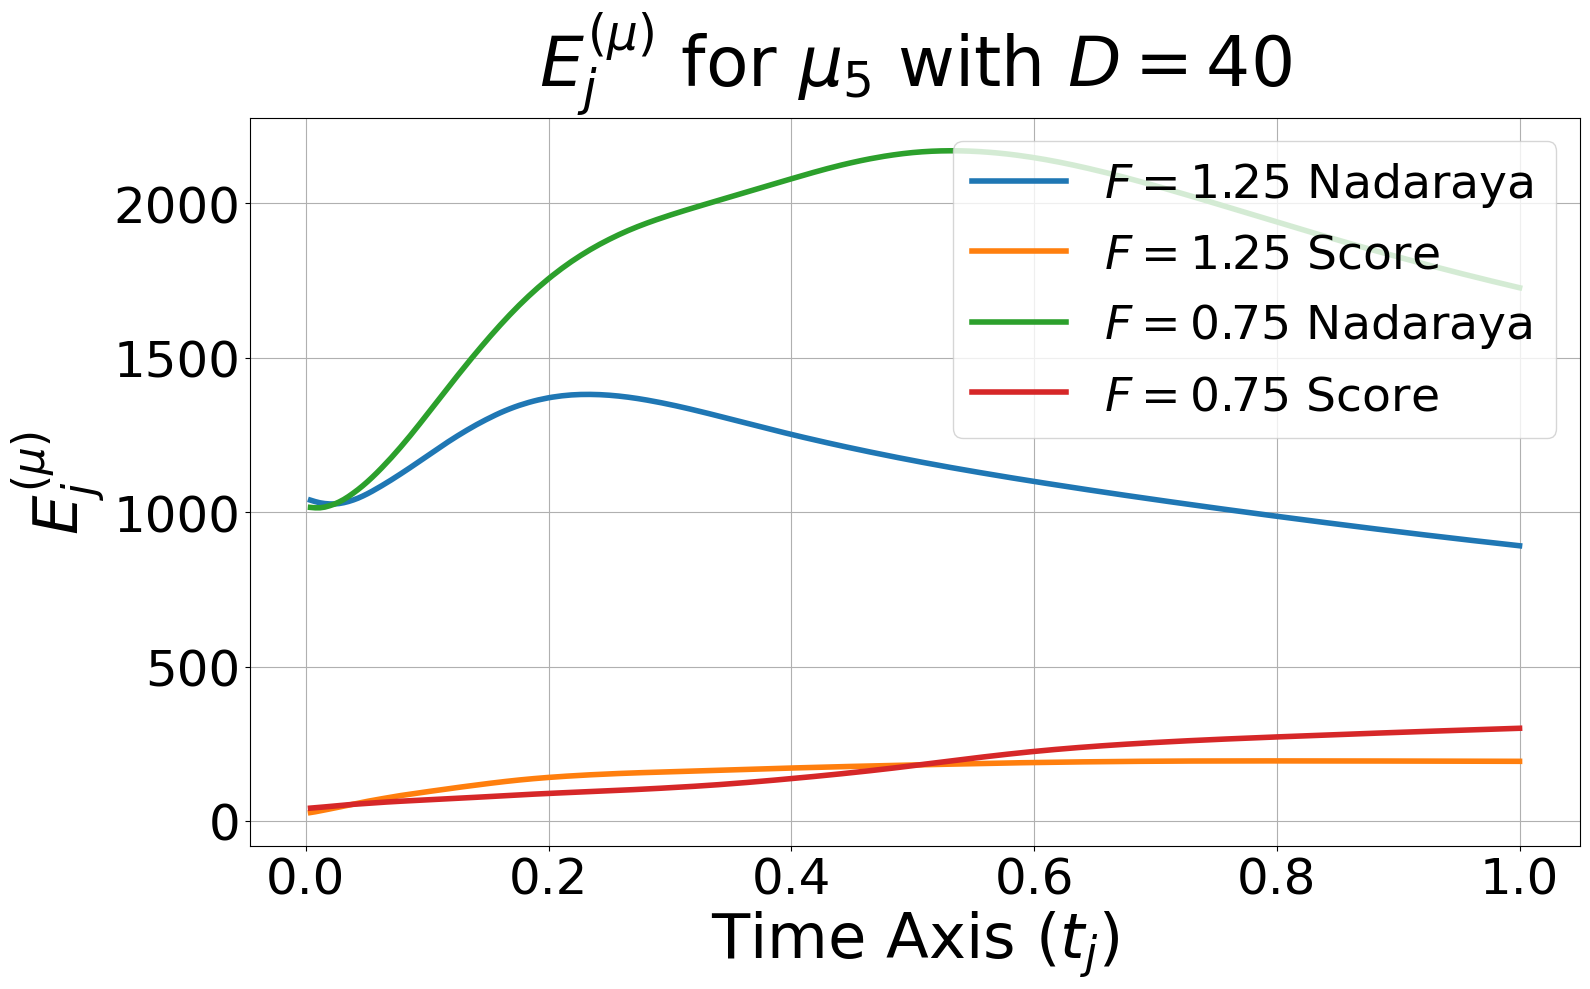

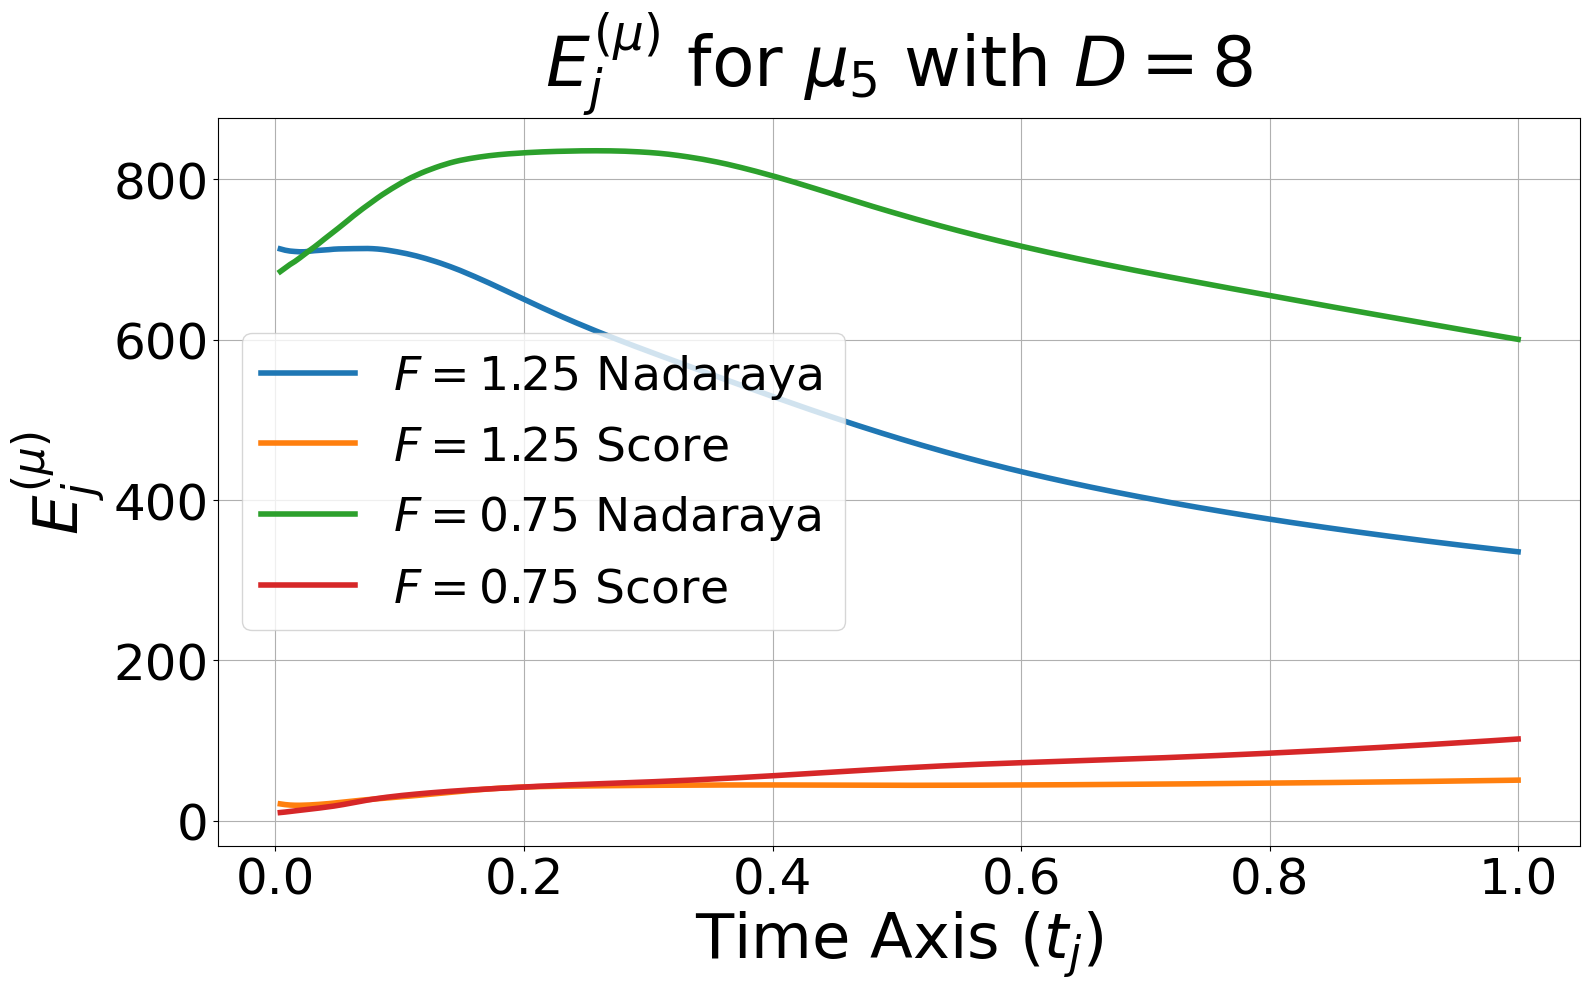

In [34]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = true_law_eval.iloc[:, k:k+4]
    d = true_law_eval.columns[k].split('DLnz')[0]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "").replace("Chaos", rf"$F=1.25$").replace("Stable", rf"$F=0.75$") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(\mu)}}_j$ for $\mu_5$ with $D={d}$", fontsize=50)
    plt.ylabel(rf"$E^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DLnzTrueLawLessData.png")
    plt.show()
    plt.close()

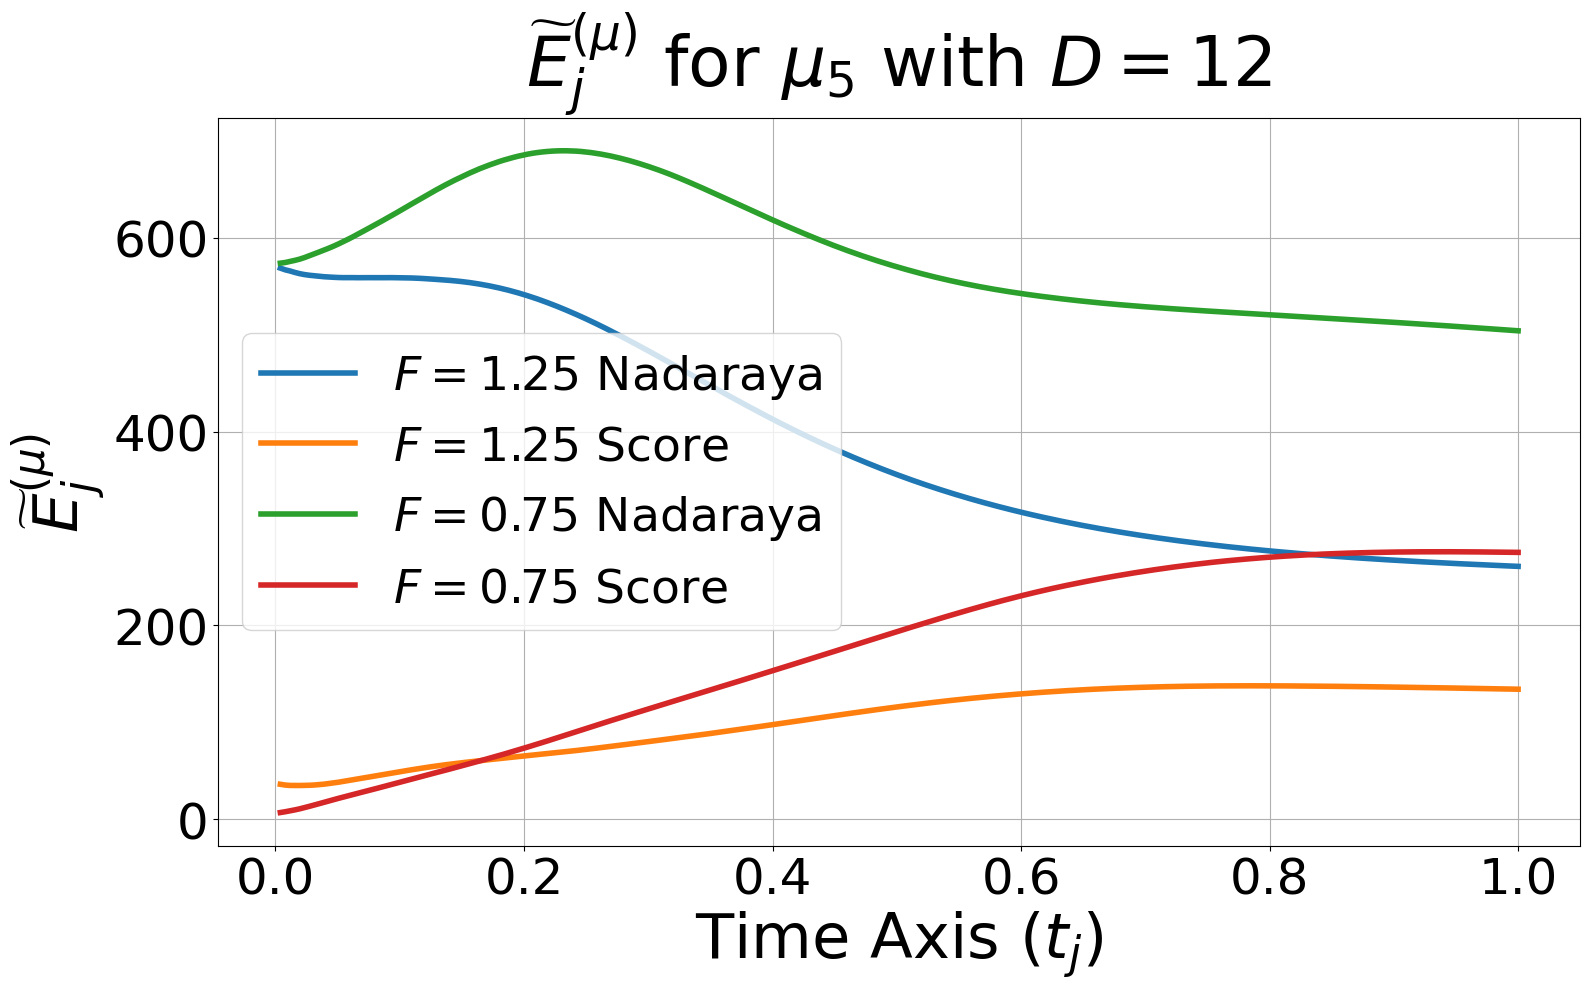

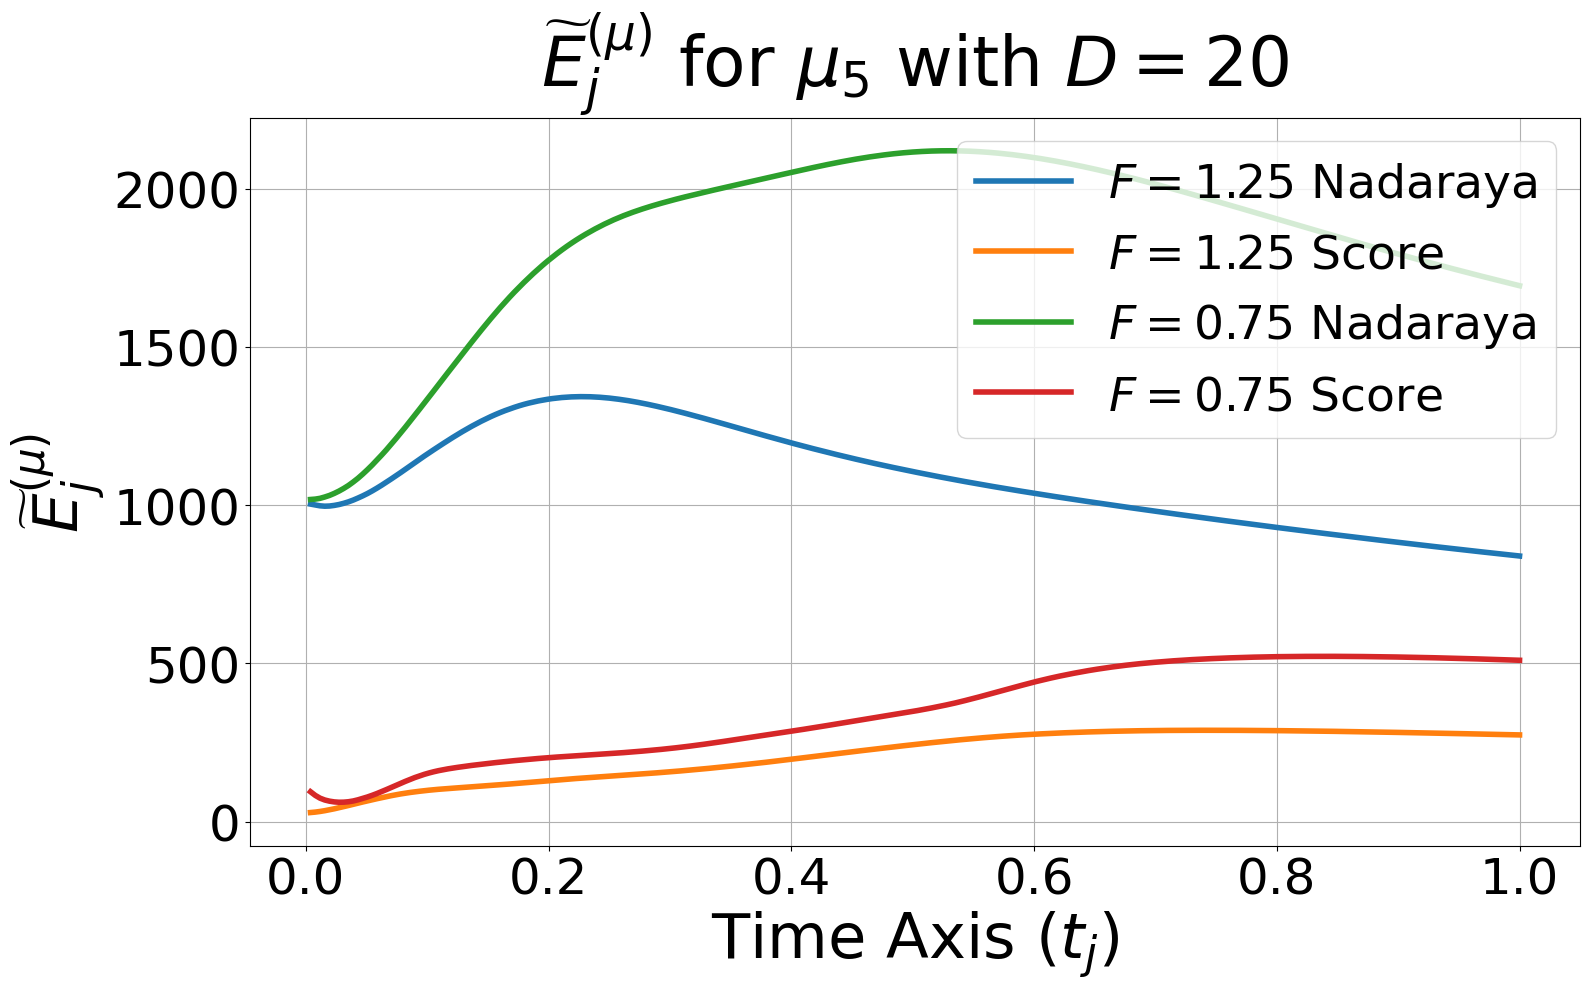

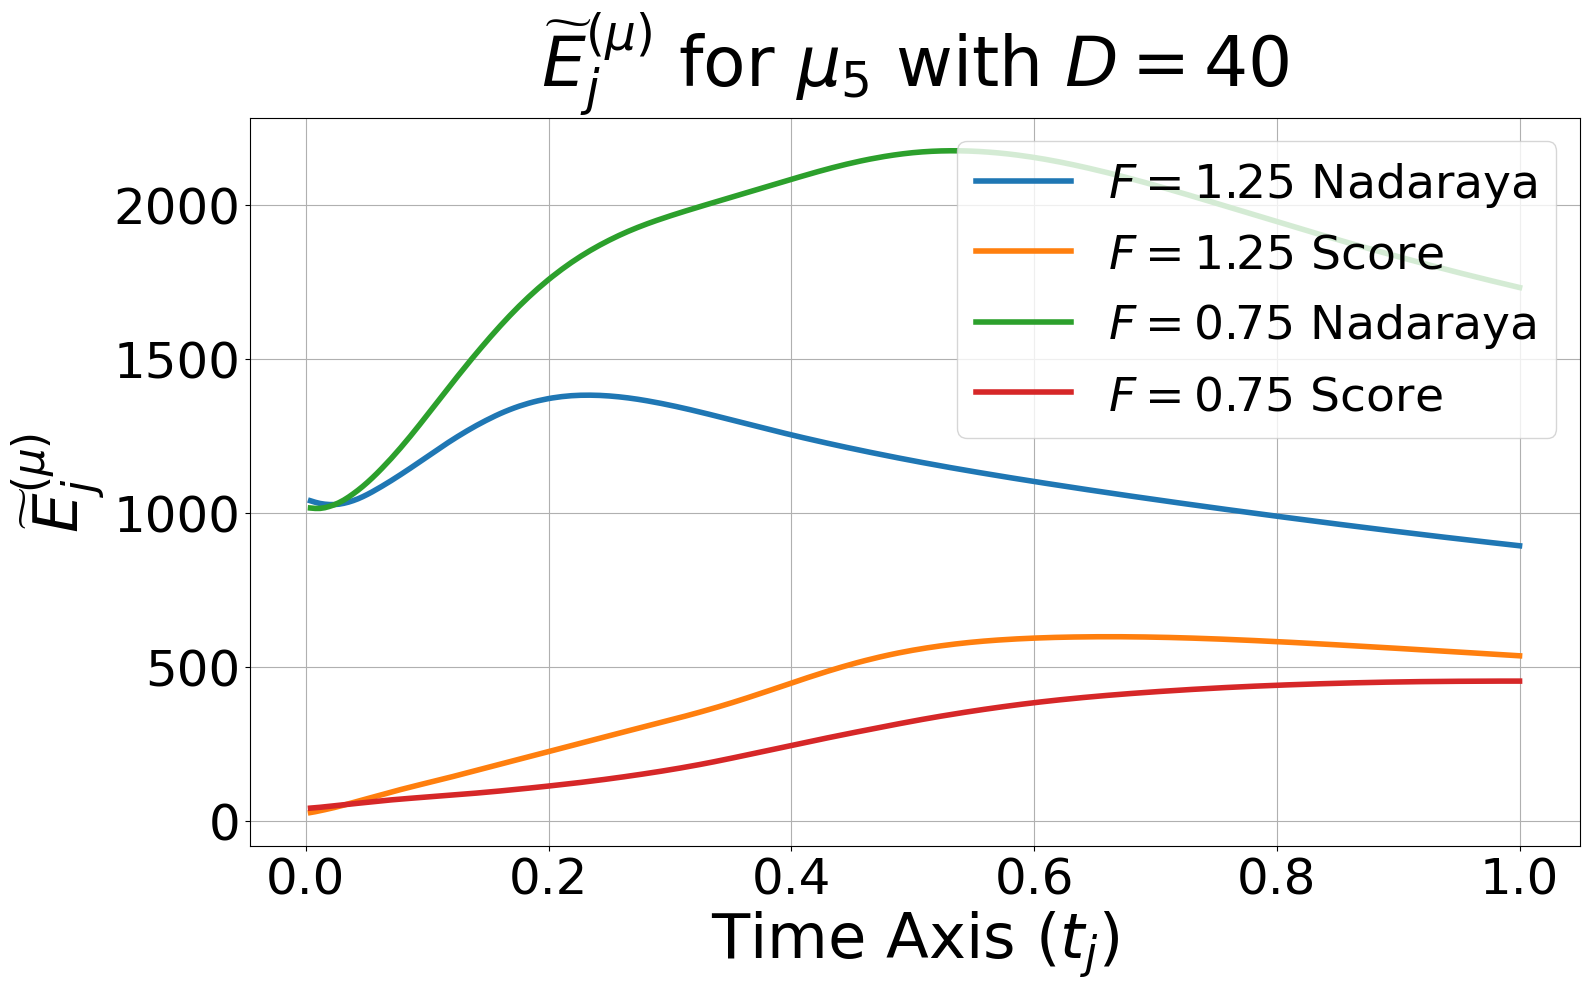

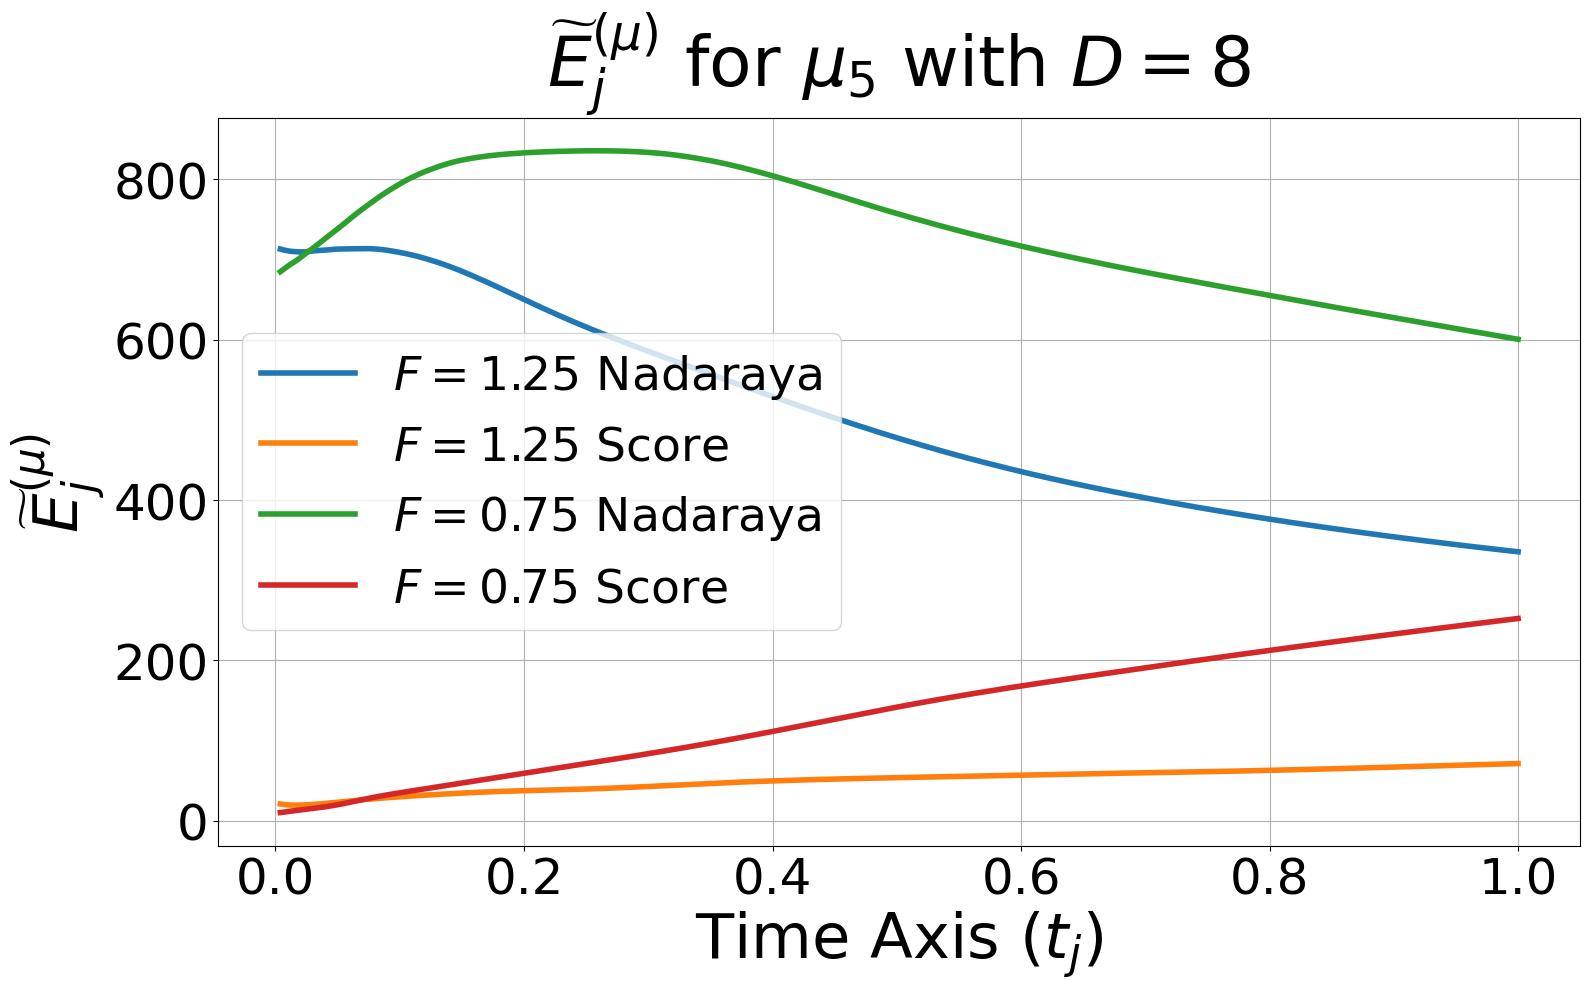

In [35]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = alt_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "").replace("Chaos", rf"$F=1.25$").replace("Stable", rf"$F=0.75$") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = alt_law_eval.columns[k].split('DLnz')[0]
    plt.title(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$ for $\mu_5$ with $D={d}$", fontsize=50)
    plt.ylabel(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DLnzAltLawLessData.png")
    plt.show()
    plt.close()

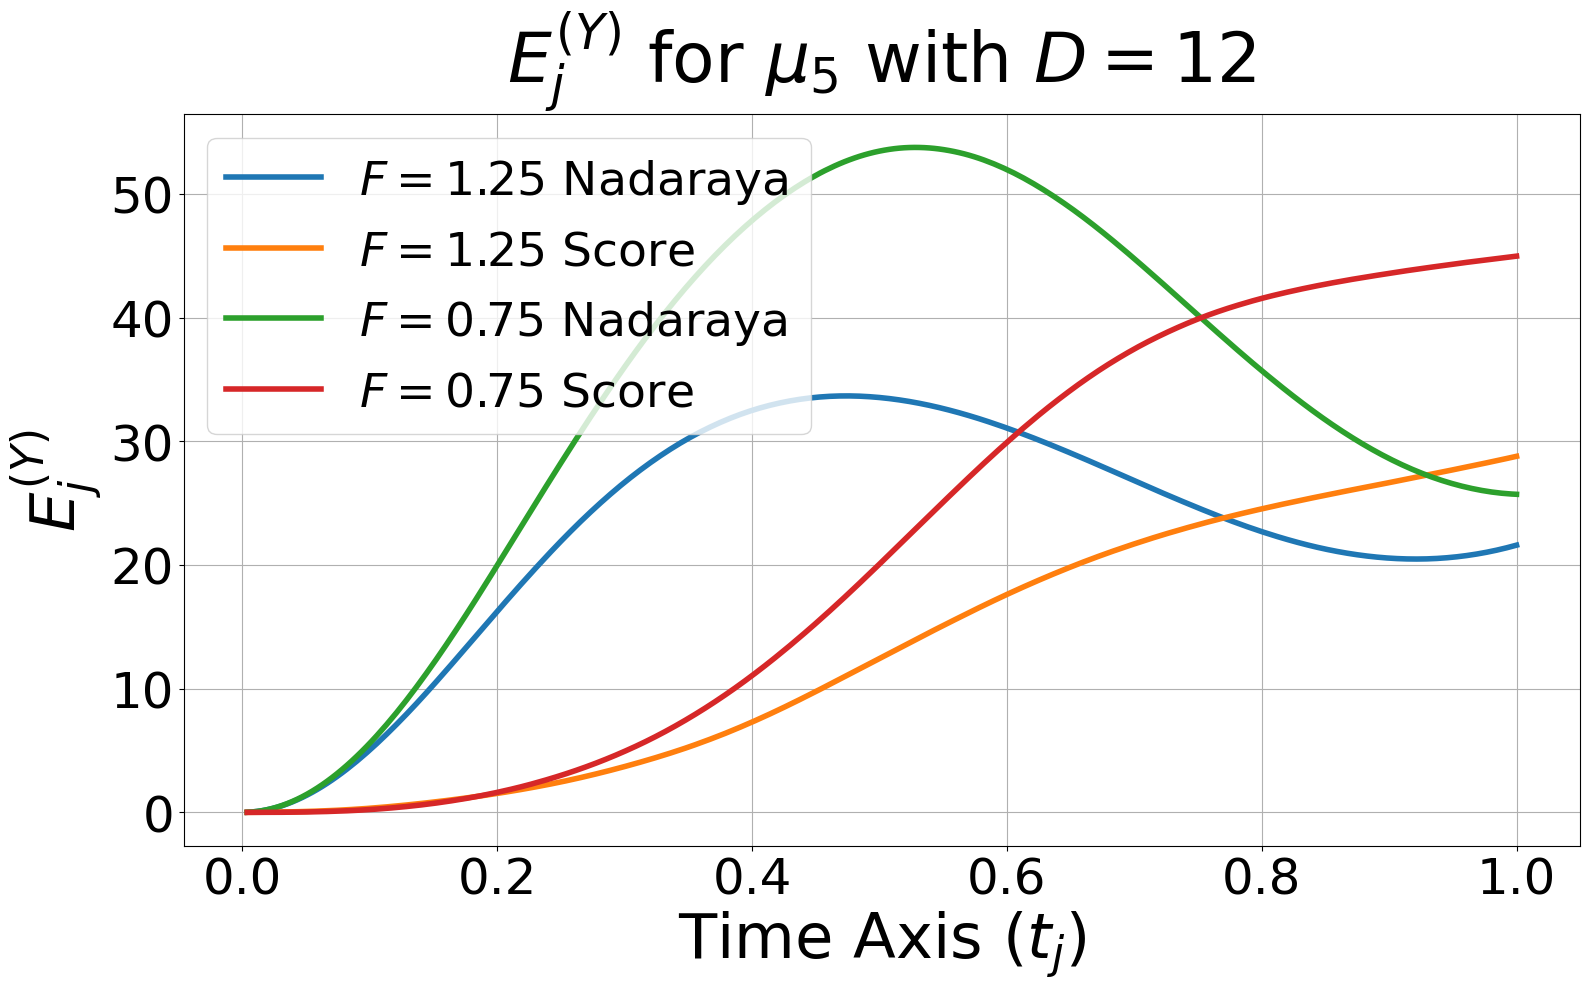

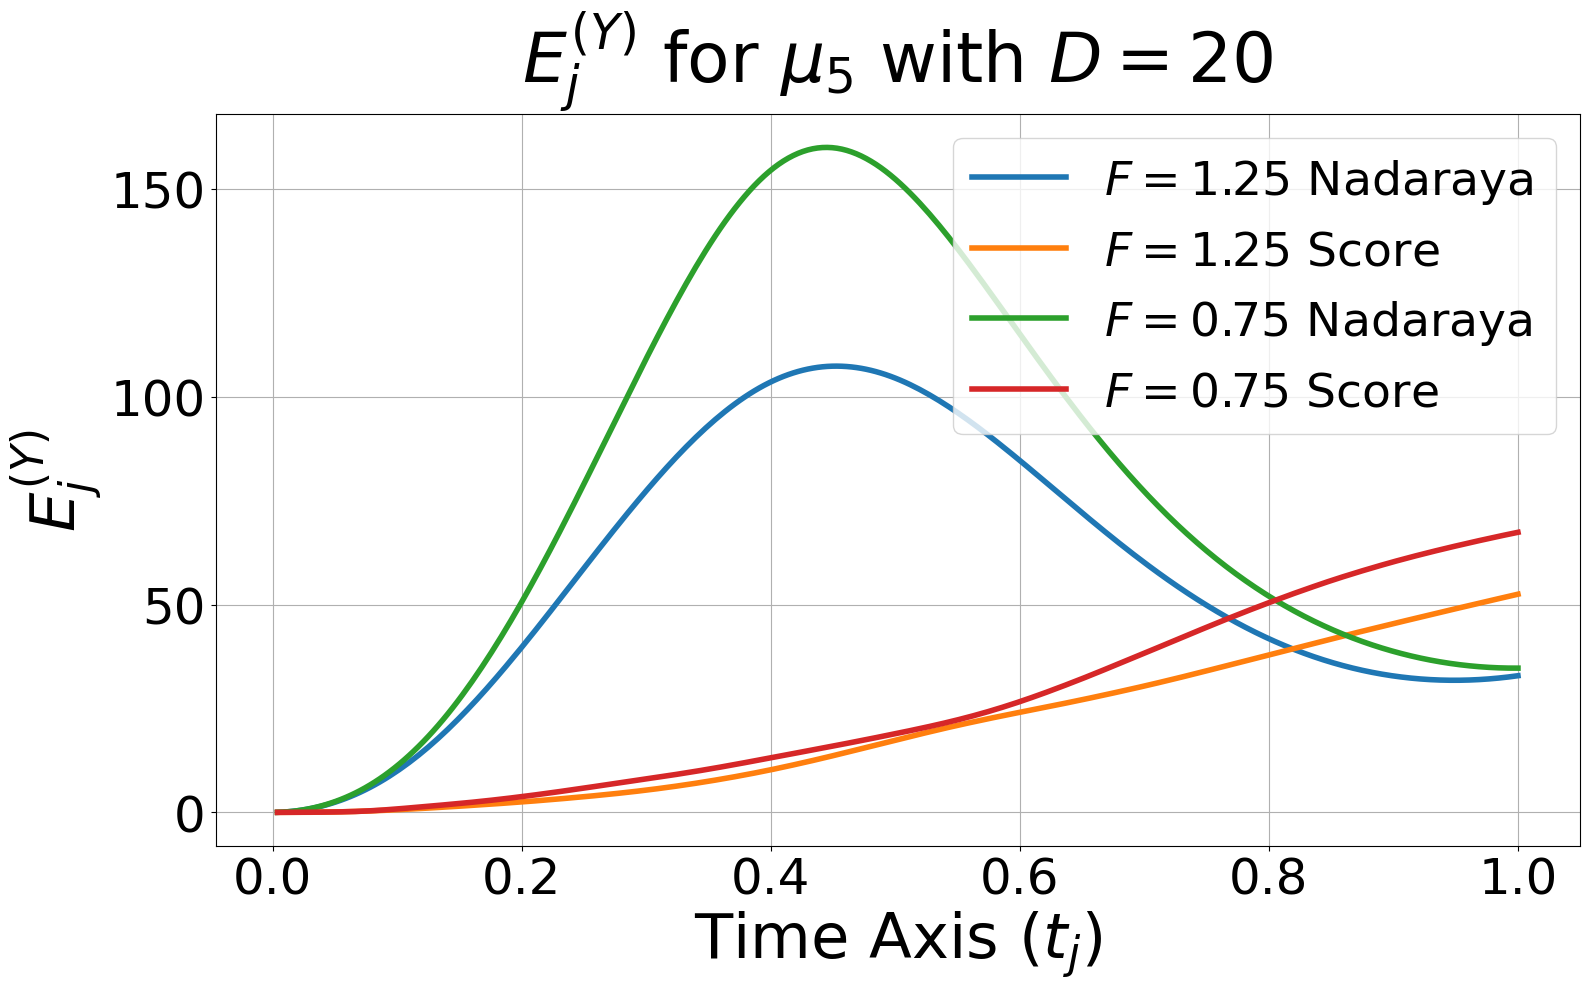

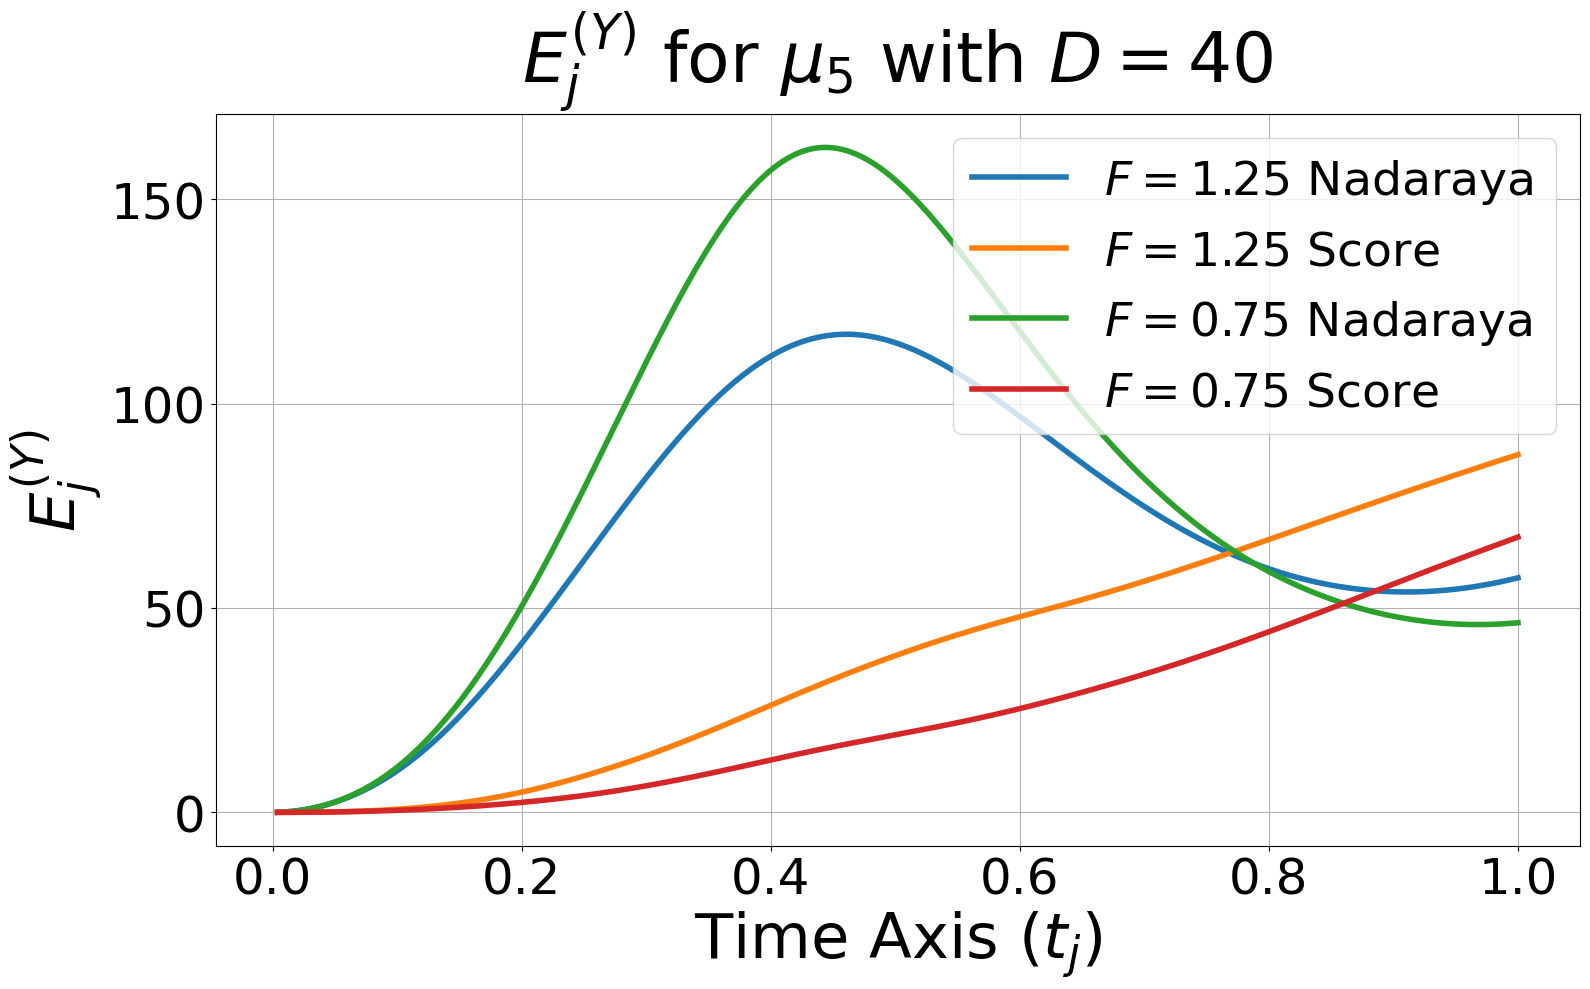

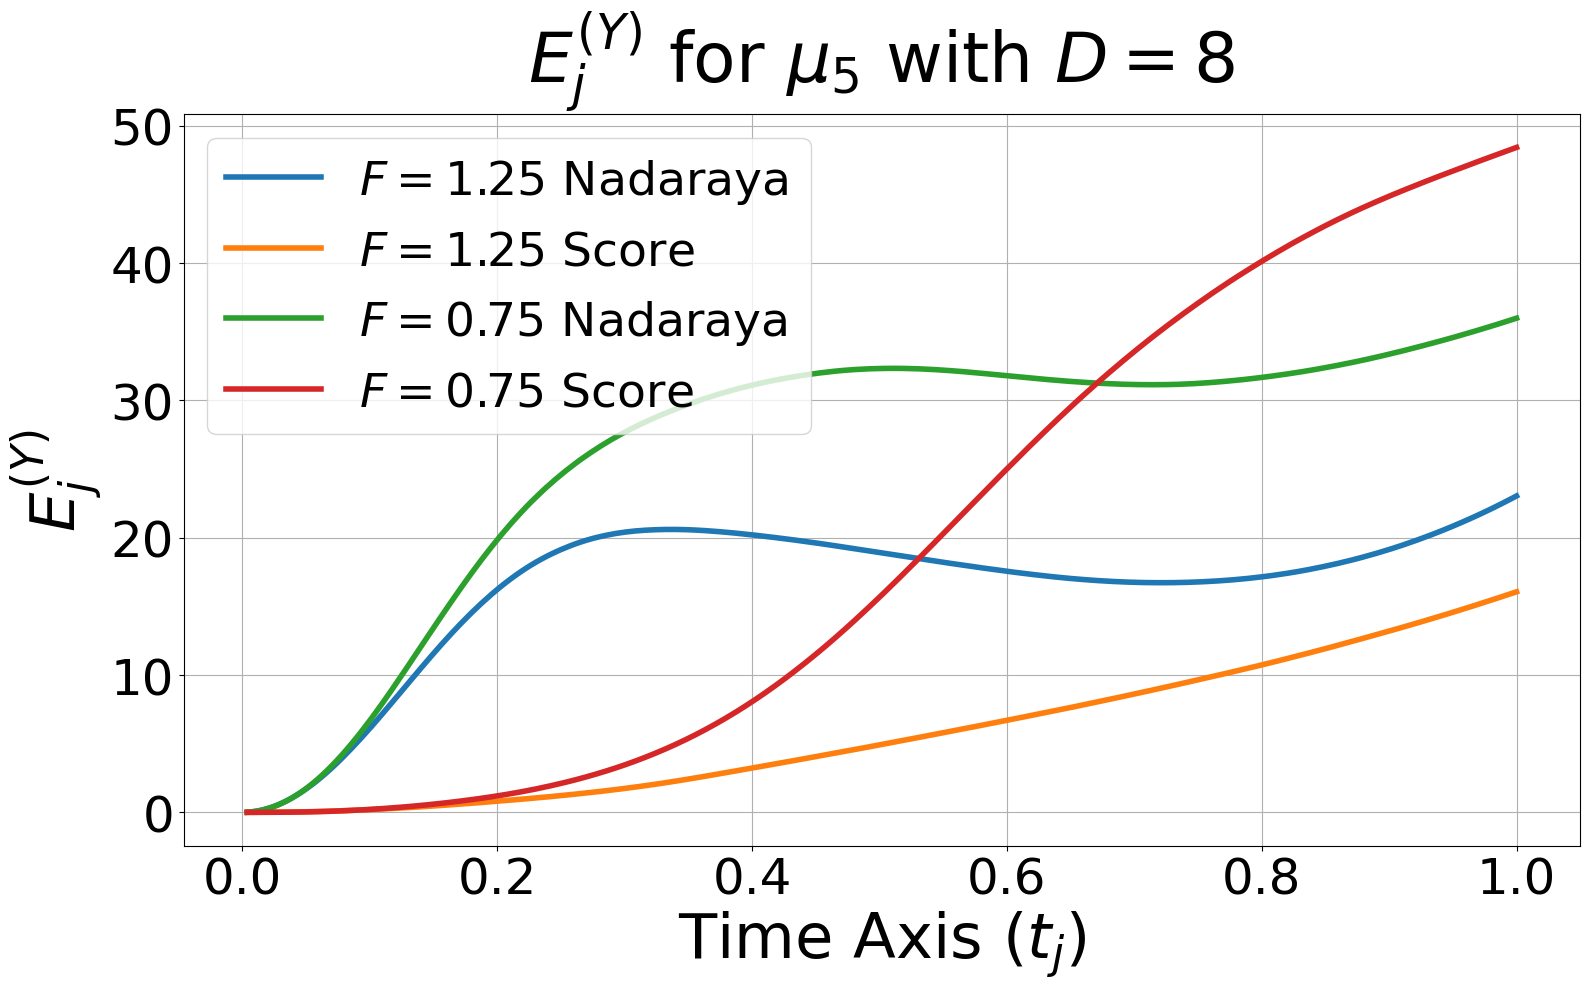

In [36]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = state_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("State", "").replace("Chaos", rf"$F=1.25$").replace("Stable", rf"$F=0.75$") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = state_eval.columns[k].split('DLnz')[0]
    plt.title(rf"$E^{{(Y)}}_j$ for $\mu_5$ with $D={d}$", fontsize=50)
    plt.ylabel(rf"$E^{{(Y)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DLnzStateErrorLessData.png")
    plt.show()
    plt.close()

In [37]:
s=(true_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DLnz')[0]))).assign(F=lambda x: x.index.map(lambda y:1.25 if "Chaos" in y else 0.75)).sort_values("F", axis=0).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("F").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))))
s.rename({s.columns[0]:""},axis=1).unstack(level=[-1,-2]).droplevel(0, axis=1).swaplevel(1,0, axis=1).round(3)

F      0.75               1.25          
T     Score _Nadaraya    Score _Nadaraya
D                                       
8   101.901   600.415   50.593   335.443
12  123.683   503.749   56.400   260.933
20  303.819  1689.309  172.590   837.808
40  300.064  1727.019  193.012   891.300

In [38]:
s=(alt_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DLnz')[0]))).assign(F=lambda x: x.index.map(lambda y:1.25 if "Chaos" in y else 0.75)).sort_values("F", axis=0).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("F").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))))
s.rename({s.columns[0]:""},axis=1).unstack(level=[-1,-2]).droplevel(0, axis=1).swaplevel(1,0, axis=1).round(3)

F      0.75               1.25          
T     Score _Nadaraya    Score _Nadaraya
D                                       
8   252.395   600.674   71.414   335.573
12  275.463   504.154  134.231   261.021
20  510.115  1693.252  274.349   839.494
40  453.816  1731.075  535.946   893.062

In [39]:
s=(state_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DLnz')[0]))).assign(F=lambda x: x.index.map(lambda y:1.25 if "Chaos" in y else 0.75)).sort_values("F", axis=0).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("F").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))))
s.rename({s.columns[0]:""},axis=1).unstack(level=[-1,-2]).droplevel(0, axis=1).swaplevel(1,0, axis=1).round(3)

F     0.75              1.25          
T    Score _Nadaraya   Score _Nadaraya
D                                     
8   48.417    35.985  16.060    23.040
12  44.964    25.713  28.783    21.601
20  67.389    34.708  52.496    32.880
40  67.341    46.385  87.498    57.372